# Load Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
from prettytable import PrettyTable
import math

In [39]:
# The matrix which is to be factorized
A = np.array([[3,4,3,0], [4,1,0,2], [2,0,0,0]])

n = A.shape[0] # No. of users
m = A.shape[1] # No. of movies/items
d = 2 # Dimension of the matrix factors

B = np.random.normal(scale=1.0, size=(n,d)) 
C = np.random.normal(scale=1.0, size=(m,d))

print("A = \n" + str(A) + str(A.shape[0]) + " x " + str(A.shape[1]))
print("B = \n" + str(B) + str(B.shape[0]) + " x " + str(B.shape[1]))
print("C = \n" + str(C) + str(C.shape[0]) + " x " + str(C.shape[1]))
print("n = ", n)
print("m = ", m)
print("d = ", d)

A = 
[[3 4 3 0]
 [4 1 0 2]
 [2 0 0 0]]3 x 4
B = 
[[-0.48835224  0.83017325]
 [-0.69302067  0.10887345]
 [ 0.48466807  0.82585312]]3 x 2
C = 
[[-0.13733906 -0.78102561]
 [ 0.20731951  1.88564535]
 [-0.74399667 -0.08387767]
 [ 1.33405098  0.83766136]]4 x 2
n =  3
m =  4
d =  2


# With Regularization

In [34]:
iterations = 10

r = 0.1 # Learning rate
beta = 0.01 # Regularization parameter
rmse_arr = [] # Array to stor Root Mean Square Error at each iteration

for iter in range(iterations):
  rmse = 0
  for i in range(n):
    for j in range(m):
      if(A[i][j] > 0): # Consider only non-zero elements of A
        B_new[i] = B[i]
        B[i] += r * ((2 * C[j]) * (A[i][j] - np.dot(B[i], C[j])) - (2 * beta * B[i]))
        C[j] += r * ((2 * B_new[i]) * (A[i][j] - np.dot(B_new[i], C[j])) - (2 * beta * C[j]))
        rmse += np.power(A[i][j] - np.dot(B[i], C[j]), 2)
  rmse_arr.append(np.round(np.sqrt(rmse)))

# A_new contains the final predicted values
A_new = np.matmul(B,C.T)
print("\nA_new = \n", A_new)
print("\nFinal RMSE: ", rmse_arr[-1])


A_new = 
 [[ 2.97816419  3.98242801  2.98946854  1.49078794]
 [ 3.96616676  0.97869866  0.81421927  1.99254701]
 [ 1.98646065 -1.89318118 -1.33746896  1.0019335 ]]

Final RMSE:  0.0


In [35]:
print("A = \n", A)
print("\nA_predicted = \n", A_new)

A = 
 [[3 4 3 0]
 [4 1 0 2]
 [2 0 0 0]]

A_predicted = 
 [[ 2.97816419  3.98242801  2.98946854  1.49078794]
 [ 3.96616676  0.97869866  0.81421927  1.99254701]
 [ 1.98646065 -1.89318118 -1.33746896  1.0019335 ]]


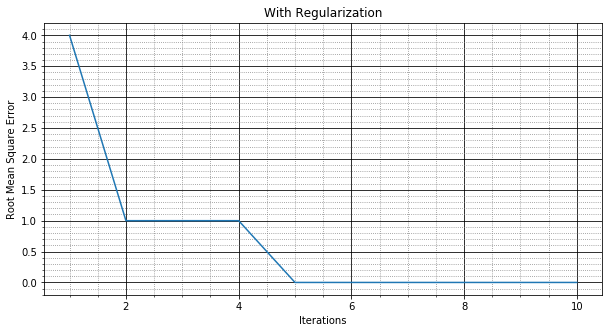

In [37]:
iters = list(range(1,iterations+1))
plt.figure(figsize=(10,5))
plt.plot(iters,rmse_arr)
plt.xlabel("Iterations")
plt.ylabel("Root Mean Square Error")
plt.title("With Regularization")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', color='black')
plt.grid(which='minor', linestyle=':', color='gray')

# Without Regularization

In [40]:
iterations = 10

r = 0.1 # Learning rate
beta = 0 # Regularization parameter

rmse_arr = [] # Array to stor Root Mean Square Error at each iteration

for iter in range(iterations):
  rmse = 0
  for i in range(n):
    for j in range(m):
      if(A[i][j] > 0): # Consider only non-zero elements of A
        B_new[i] = B[i]
        B[i] += r * ((2 * C[j]) * (A[i][j] - np.dot(B[i], C[j])) - (2 * beta * B[i]))
        C[j] += r * ((2 * B_new[i]) * (A[i][j] - np.dot(B_new[i], C[j])) - (2 * beta * C[j]))
        rmse += np.power(A[i][j] - np.dot(B[i], C[j]), 2)
  rmse_arr.append(np.round(np.sqrt(rmse)))

# A_new contains the final predicted values
A_new = np.matmul(B,C.T)
print("\nA_new = \n", A_new)
print("\nFinal RMSE: ", rmse_arr[-1])


A_new = 
 [[3.00620031 4.02754696 3.03311558 3.65692015]
 [4.02966059 0.9847704  3.22104732 1.98653654]
 [2.00337834 1.81701575 1.85539787 1.86437904]]

Final RMSE:  0.0


In [41]:
print("A = \n", A)
print("\nA_predicted = \n", A_new)

A = 
 [[3 4 3 0]
 [4 1 0 2]
 [2 0 0 0]]

A_predicted = 
 [[3.00620031 4.02754696 3.03311558 3.65692015]
 [4.02966059 0.9847704  3.22104732 1.98653654]
 [2.00337834 1.81701575 1.85539787 1.86437904]]


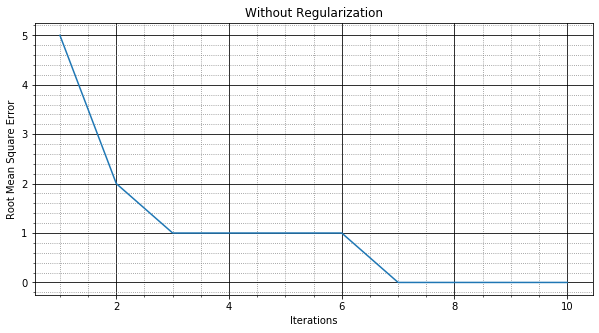

In [43]:
iters = list(range(1,iterations+1))
plt.figure(figsize=(10,5))
plt.plot(iters,rmse_arr)
plt.xlabel("Iterations")
plt.ylabel("Root Mean Square Error")
plt.title("Without Regularization")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', color='black')
plt.grid(which='minor', linestyle=':', color='gray')